# Линейная Регрессия

**Линейная регрессия (Linear Regression)** - модель зависимости переменной от одной или нескольких других переменных(предикторов, факторов, регрессоров, независимых переменных) с линейной функцией зависимости. \
$$
f(x) = wx+b
$$
$w$ - Коэффициент наклона. Вес при $x$. \
$b$ - Свободный член. Сдвиг модели. 
\

**Задача регрессии**: Подгонка таких значений $k$ и свободного члена $b$ , которые будут лучше всего описывать линию тренда, проходящую через все значения.

**Обучение регрессии**: Осуществляется методами оптимизации, решением задачи минимизации функции потерь **L(loss function) -> min**, сведения ошибки к минимуму.\
Подгонка значений в соответствии с алгоритмом для нахождения экстремума функции(минимальной ошибки) с заданным шагом обучения(**learning rate**) \
В таком случаи значения $k$ и $b$ будут являться оптимальными.


**Градиентный спуск (GD, Gradient Descent)**


**OLS Метод наименьших квадратов (Ordinary Least Squares)** 

**Стохастический радиентный спуск (SGD)**

Метрики:\
**MAE (Mean Absolute Error)**

**MSE (Mean Squared Error)**\
**RMSE (Root Mean Squared Error, корень из MSE)** \
**R$^2$ (Коэффициент детерминации)**


## Градиентный спуск

Градиентный спуск на примере параболы

In [273]:
# Параболоидная функция
def func(x):
    return x**2

# Градиент функции(производная)
def grad_func(x):
    return 2*x

In [339]:
X = np.linspace(-10, 10, 30)
Y = func(X)
G = grad_func(X)

start_point = 5
grad = grad_func(start_point)

next_point = start_point+grad
learning_rate = 0.1

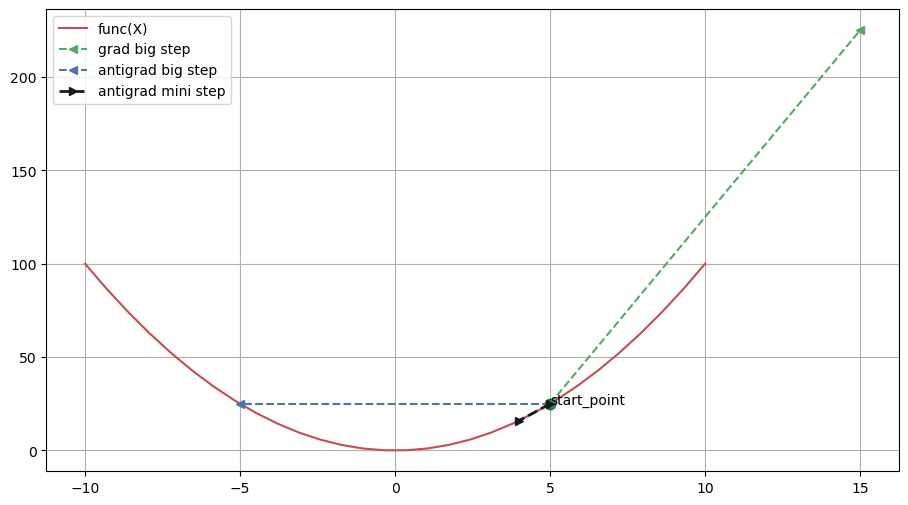

In [362]:
plt.figure(figsize=(11, 6))
plt.grid()

plt.plot(X, Y, c='r', label=('func(X)')) # Парабола
plt.plot(start_point, func(start_point), c='green', marker='.', markersize='15') # Стартовая точка
plt.text(start_point, func(start_point), 'start_point')

# Направление скореейшего роста
plt.plot((start_point, next_point), func(np.array([start_point, next_point])), '<--g', label='grad big step') 

# Направление Наискорейшего спуска
antigradient = start_point - grad
plt.plot((start_point, antigradient), func(np.array([start_point, antigradient])), '<--b', label='antigrad big step') 

# Направление Наискорейшего спуска c нормированием на шаг, чтобы не перескочить минимум
antigrad_mini = start_point - learning_rate*grad
plt.plot((start_point, antigrad_mini), func(np.array([start_point, antigrad_mini])), '-->k', label='antigrad mini step', linewidth=2 ) 

plt.legend();

Итерация: 0
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 1
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 2
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 3
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 4
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 5
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 6
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 7
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

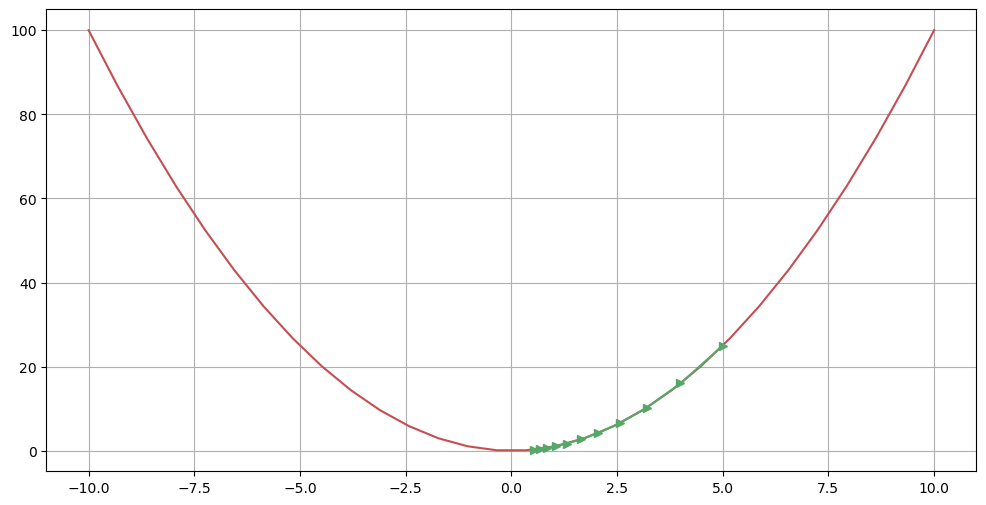

In [382]:
start_point = 5
learning_rate = 0.1
next_point = start_point
n = 10

x = []
x.append(next_point)

plt.figure(figsize=(12, 6))
plt.plot(X, Y, c='r', label=('func(X)')) # Парабола
plt.grid()
for i in range(n):
    current_point = next_point
    next_point = current_point -grad_func(current_point) * learning_rate
    x.append(next_point)
    print(f"Итерация: {i}")
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    
    

X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '->g');

Итерация: 1
Текущая точка 5| Следующая точка 4.0
--------------------------------------------------------
Итерация: 2
Текущая точка 4.0| Следующая точка 3.2
--------------------------------------------------------
Итерация: 3
Текущая точка 3.2| Следующая точка 2.56
--------------------------------------------------------
Итерация: 4
Текущая точка 2.56| Следующая точка 2.048
--------------------------------------------------------
Итерация: 5
Текущая точка 2.048| Следующая точка 1.6384
--------------------------------------------------------
Итерация: 6
Текущая точка 1.6384| Следующая точка 1.31072
--------------------------------------------------------
Итерация: 7
Текущая точка 1.31072| Следующая точка 1.0485760000000002
--------------------------------------------------------
Итерация: 8
Текущая точка 1.0485760000000002| Следующая точка 0.8388608000000002
--------------------------------------------------------
Итерация: 9
Текущая точка 0.8388608000000002| Следующая точка 0.671088640

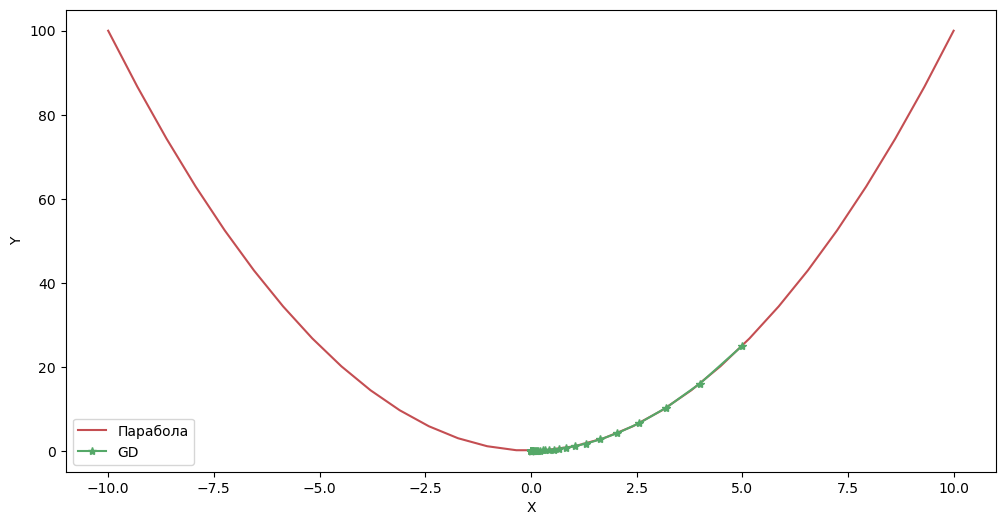

In [390]:
# Критерий останова. Если разница между точками отличается меньше чем на одну десятитысячную алгоритм завершается
eps = 0.0001

# Стартовая позиция
start_point = 5

# Размер шага
learning_rate = 0.1

# Начальная точка
next_point = start_point

# Контейнер для точек(для отрисовки)
x = []
x.append(next_point)

# Параболоидная функция
plt.figure(figsize=(12, 6))
plt.plot(X, Y, c='r', label=('Парабола')) 

# количество итераций
flag = True
i = 1
while flag:
    current_point = next_point

    #Движение против градиента
    next_point = current_point - grad_func(current_point)*learning_rate
    x.append(next_point)

    # Логирование
    print(f"Итерация: {i}")
    i += 1
    print(f"Текущая точка {current_point}| Следующая точка {next_point}")
    print("--------------------------------------------------------")
    # Остановка по критерию
    if(abs(current_point - next_point) <= eps):
        flag = False
print(f"минимум {next_point}, количество затраченных итераций: {i-1}") 

X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y');

## Реализация с нуля

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Данные**

In [4]:
X = np.array([2, 2, 4, 4, 6, 6, 8, 8])
y = np.array([-2, 2, 0, 4, 2, 6, 4, 8])
df = pd.DataFrame({'X':X, 'y': y})

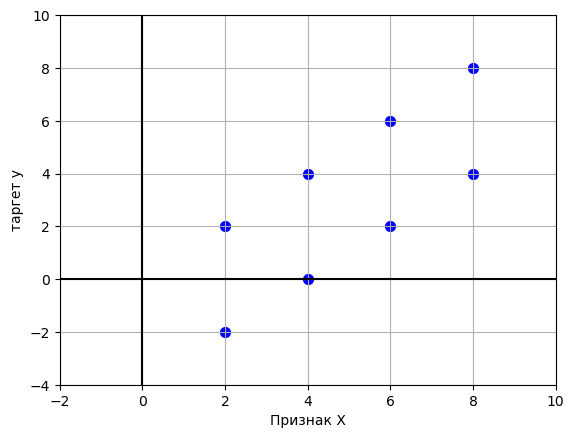

In [5]:
plt.grid()
plt.xlim((-2, 10))
plt.ylim((-4, 10))

#Главная ось
ax = plt.gca()
ax.axhline(y=0, color='k', ls='-')
ax.axvline(x=0, color='k', ls='-')

plt.xlabel('Признак X')
plt.ylabel('таргет y')
plt.scatter(df['X'], df['y'], c='blue', s=50);

In [78]:
class Linear_Regression():
    def __init__(self, learning_rate=0.005, eps=0.01):
        self.learning_rate = learning_rate
        self.eps = eps
        self.weights = []#
        self.score = [] #

    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        

        for i in range(300):
            y_predict = X.dot(self.weights)
            error = y_predict - y
            dw = 2/n_samples * X.T.dot(error)
            self.weights = self.weights - dw*self.learning_rate
            self.score.append(self.mse(y_predict, y))
            
            if len(self.score)>n_features and self.score[-1] - self.score[-n_features] < self.eps:
                break
                
    def mse(self, y_predict, y):
        return np.mean((y - y_predict)**2)

    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return X.dot(self.weights)

In [79]:
reg = Linear_Regression()

In [80]:
reg.fit(df[['X']], y)

In [81]:
reg.weights

array([0.062278, 0.434465])

In [82]:
y_predicted = reg.predict(df[['X']])

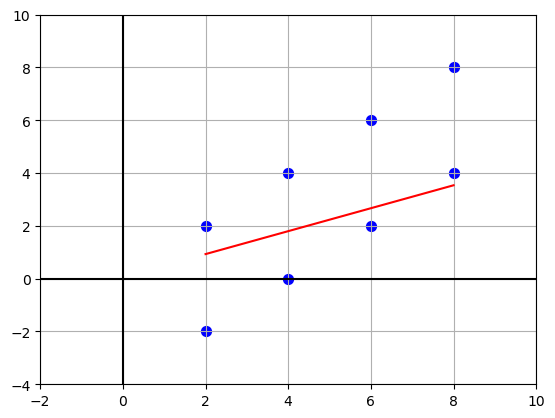

In [83]:
plt.grid()
plt.xlim((-2, 10))
plt.ylim((-4, 10))

#Главная ось
ax = plt.gca()
ax.axhline(y=0, color='k', ls='-')
ax.axvline(x=0, color='k', ls='-')

plt.plot(df['X'], y_predicted, c='r')
plt.scatter(df['X'], df['y'], s=50, c='blue');

## Sklearn-реализация

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
from sklearn.linear_model import LinearRegression

In [258]:
X = np.array([2, 2, 4, 4, 6, 6, 8, 8])
y = np.array([-2, 2, 0, 4, 2, 6, 4, 8])
df = pd.DataFrame({'X':X, 'y': y})
df

,X,y
0,2,-2
1,2,2
2,4,0
3,4,4
4,6,2
5,6,6
6,8,4
7,8,8


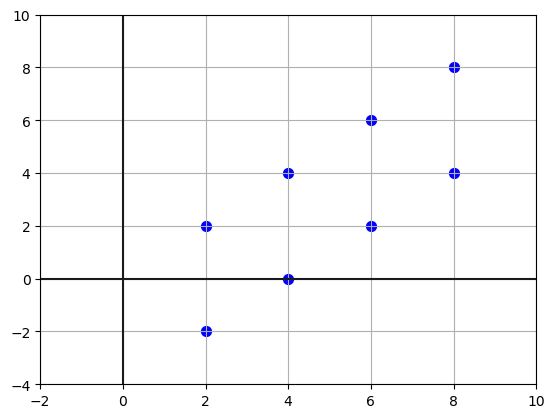

In [204]:
plt.grid()
plt.xlim((-2, 10))
plt.ylim((-4, 10))

#Главная ось
ax = plt.gca()
ax.axhline(y=0, color='k', ls='-')
ax.axvline(x=0, color='k', ls='-')

plt.scatter(df['X'], df['y'], c='blue', s=50);

In [182]:
model = LinearRegression()
model

LinearRegression()

In [183]:
model.fit(df[['X']], df['y'])

LinearRegression()

In [184]:
model.intercept_, model.coef_

(-2.0, array([1.]))

In [185]:
model_y = model.predict(df[['X']])
model_y

array([0., 0., 2., 2., 4., 4., 6., 6.])

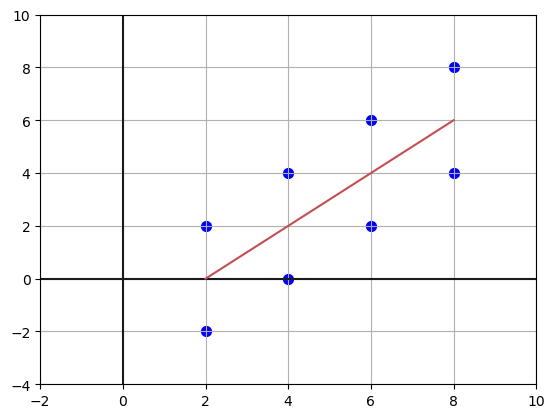

In [256]:
plt.grid()
plt.xlim((-2, 10))
plt.ylim((-4, 10))

#Главная ось
ax = plt.gca()
ax.axhline(y=0, color='k', ls='-')
ax.axvline(x=0, color='k', ls='-')

plt.plot(df['X'], model_y, c='r')
plt.scatter(df['X'], df['y'], s=50, c='blue');

In [266]:
df['model_y'] = model_y

In [268]:
df['difference'] = df['model_y'] - df['y']

**MSE**

In [272]:
np.mean(df['difference']**2)

4.0

In [271]:
from sklearn.metrics import mean_squared_error as mse
mse(df['y'], df['model_y'])

4.0

## Многомерная линейная регрессия

In [33]:
import zipfile, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
x, k, b = np.arange(-10, 10), 2, 1
y = k*x + b

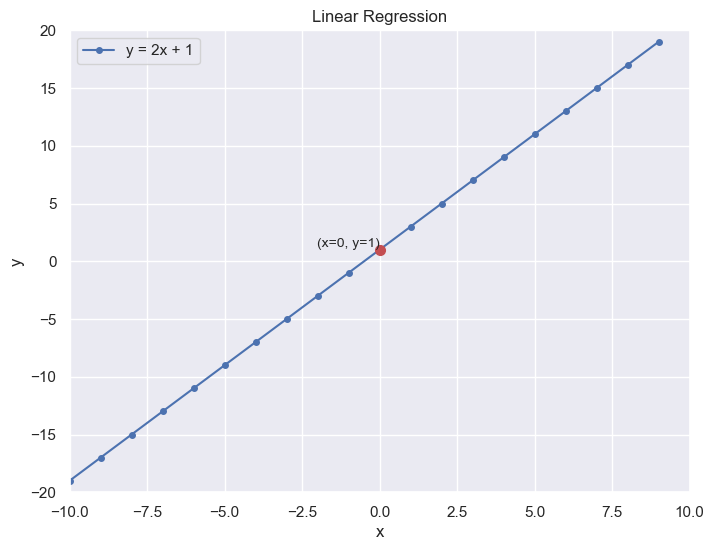

In [118]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'y = {k}x + {b}', marker='o', markersize=4)
plt.plot(0, b, color='r', marker='o', markersize=7)
plt.text(0, b, f'(x=0, y={b})', fontsize=10, ha='right', va='bottom')
plt.ylabel('y')
plt.xlabel('x')

plt.xlim(-10, 10)
plt.ylim(-20, 20)

plt.title('Linear Regression')
plt.legend();

### Загрузка данных

In [84]:
z = zipfile.ZipFile('archive.zip', 'r')

NameError: name 'zipfile' is not defined

In [35]:
df = pd.read_csv(z.open(z.namelist()[0]))

In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
df['price'] = df['price']/100_000
df['sqft_living'] = df['sqft_living']/1000

In [38]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,2.219,3,1.00,1.18,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,5.380,3,2.25,2.57,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,1.800,2,1.00,0.77,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,6.040,4,3.00,1.96,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,5.100,3,2.00,1.68,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


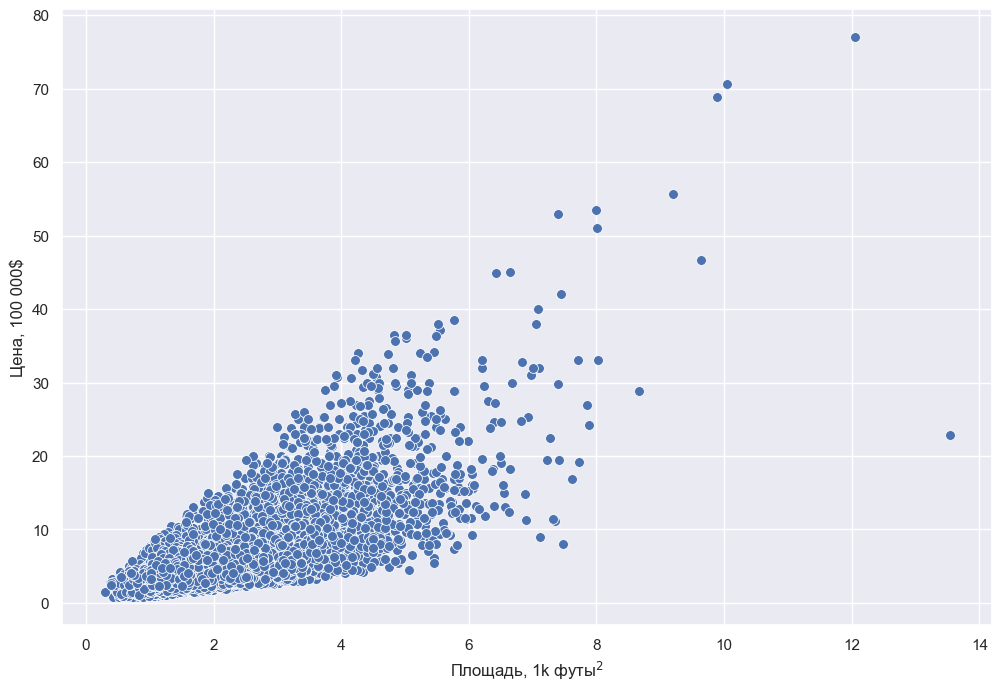

In [42]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['sqft_living'], y=df['price'], c='b', s=50)

plt.ylabel('Цена, 100 000$')
plt.xlabel('Площадь, 1k футы$^2$');

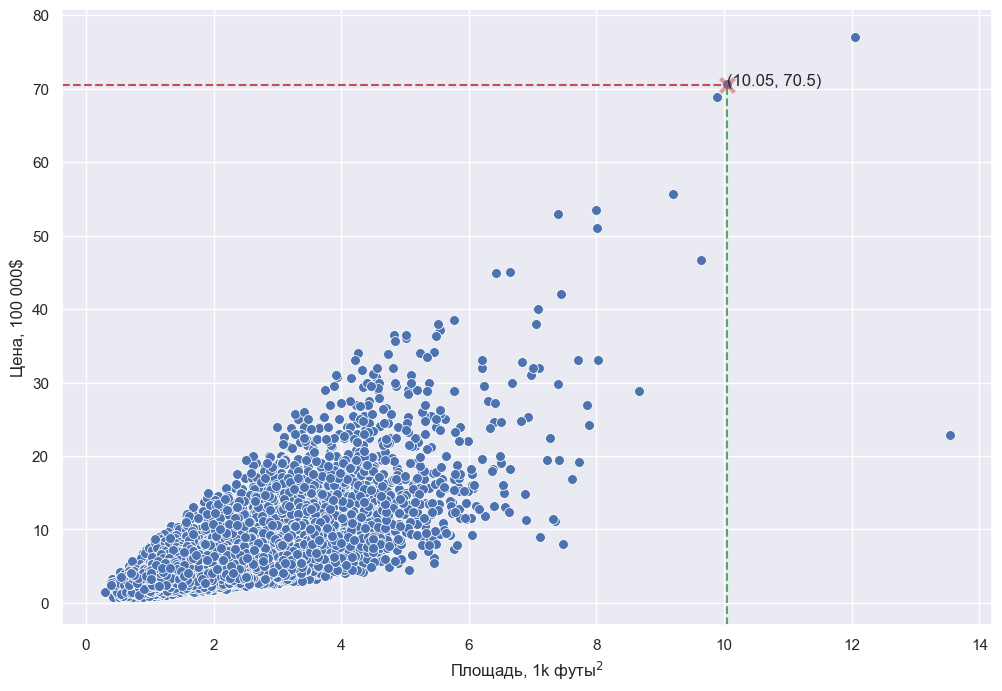

In [113]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['sqft_living'], y=df['price'], c='b', s=50)

plt.ylabel('Цена, 100 000$')
plt.xlabel('Площадь, 1k футы$^2$')

plt.text(s='(10.05, 70.5)', x=10.05, y=70.5)
plt.scatter(x=10.05, y=70.5, marker='x', c='r', s=100, linewidth=3, alpha=0.5)
plt.axvline(x=10.05,ymax=0.87, c='g', ls='--')
plt.axhline(y=70.5,xmax=0.71, c='r', ls='--');
